In [1]:
import pandas as pd
import numpy as np

In [2]:
import pyandev
import pyandev.discretisation as d
from pyandev.tests import data as test_data

In [3]:
pyandev.__version__

'0.1.0'

# Load data

In [4]:
boston_df = test_data.load_boston_df(insert_missings = True, add_weights_column = True)

In [5]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target,weights
0,0.00632,18.0,NaN,0.0,0.538,NaN,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,0.333333
1,0.02731,NaN,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,2.666667
2,NaN,NaN,7.07,0.0,NaN,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,NaN,34.7,2.333333
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,NaN,2.94,33.4,3.000000
4,0.06905,0.0,2.18,NaN,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,NaN,36.2,0.333333


# Equal width bucketing

In [6]:
CRIM_bucket = d.discretise(
    df = boston_df, 
    variable = 'CRIM', 
    n = 15, 
    bucketing_type = 'equal_width'
)

In [7]:
CRIM_bucket.value_counts(dropna = False).sort_index()

(-0.08360000000000001, 5.938]    378
(5.938, 11.869]                   42
(11.869, 17.8]                    21
(17.8, 23.732]                    10
(23.732, 29.663]                   4
(29.663, 35.594]                   0
(35.594, 41.526]                   0
(41.526, 47.457]                   1
(47.457, 53.388]                   1
(53.388, 59.32]                    0
(59.32, 65.251]                    0
(65.251, 71.182]                   1
(71.182, 77.114]                   1
(77.114, 83.045]                   0
(83.045, 88.976]                   1
Null                              46
Name: CRIM, dtype: int64

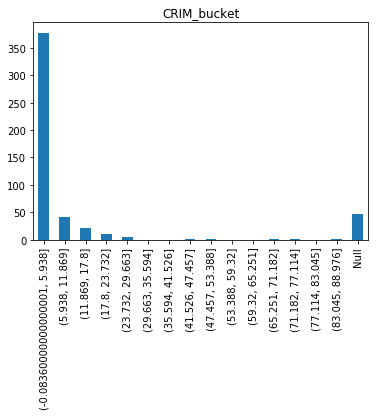

In [8]:
CRIM_bucket.value_counts(dropna = False).sort_index().plot('bar', title = 'CRIM_bucket')

# Equal weight bucketing

In [9]:
CRIM_bucket_2 = d.discretise(
    df = boston_df, 
    variable = 'CRIM', 
    n = 15, 
    bucketing_type = 'equal_weight',
    weights_column = 'weights'
)

In [10]:
CRIM_bucket_2.value_counts(dropna = False).sort_index()

(0.00532, 0.0324]    31
(0.0324, 0.0476]     35
(0.0476, 0.0719]     40
(0.0719, 0.104]      39
(0.104, 0.145]       38
(0.145, 0.196]       29
(0.196, 0.291]       29
(0.291, 0.523]       33
(0.523, 0.994]       32
(0.994, 2.678]       33
(2.678, 6.666]       43
(6.666, 10.293]      32
(10.293, 18.358]     29
Null                 63
Name: CRIM, dtype: int64

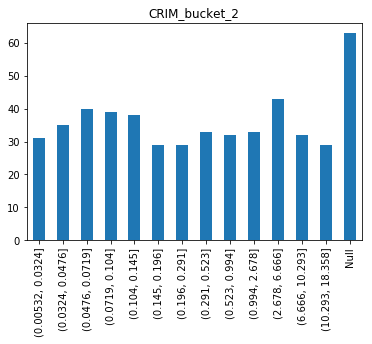

In [11]:
CRIM_bucket_2.value_counts(dropna = False).sort_index().plot('bar', title = 'CRIM_bucket_2')

In [12]:
boston_df.groupby(CRIM_bucket_2)['weights'].sum()

CRIM
(0.00532, 0.0324]    50.666667
(0.0324, 0.0476]     48.666667
(0.0476, 0.0719]     48.666667
(0.0719, 0.104]      49.333333
(0.104, 0.145]       50.000000
(0.145, 0.196]       48.666667
(0.196, 0.291]       47.333333
(0.291, 0.523]       50.666667
(0.523, 0.994]       49.666667
(0.994, 2.678]       48.333333
(2.678, 6.666]       49.333333
(6.666, 10.293]      50.000000
(10.293, 18.358]     48.000000
Null                 98.666667
Name: weights, dtype: float64

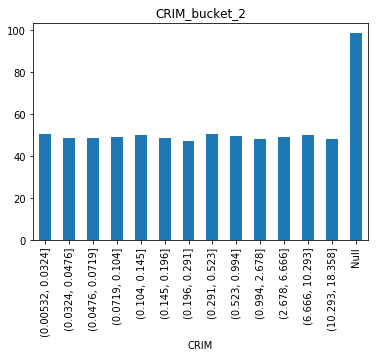

In [13]:
boston_df.groupby(CRIM_bucket_2)['weights'].sum().plot('bar', title = 'CRIM_bucket_2')

# Quantile bucketing

In [14]:
CRIM_bucket_3 = d.discretise(
    df = boston_df, 
    variable = 'CRIM', 
    bucketing_type = 'quantile', 
    quantiles = np.linspace(0, 1, 11)
)

In [15]:
boston_df['CRIM'].quantile(np.linspace(0, 1, 11))

0.0     0.006320
0.1     0.037347
0.2     0.064562
0.3     0.097020
0.4     0.147100
0.5     0.250895
0.6     0.538244
0.7     1.473248
0.8     5.249644
0.9    10.293120
1.0    88.976200
Name: CRIM, dtype: float64

In [16]:
CRIM_bucket_3.value_counts(dropna = False).sort_index()

(0.00532, 0.0373]    46
(0.0373, 0.0646]     46
(0.0646, 0.097]      46
(0.097, 0.147]       46
(0.147, 0.251]       46
(0.251, 0.538]       46
(0.538, 1.473]       46
(1.473, 5.25]        46
(5.25, 10.293]       46
(10.293, 88.976]     46
Null                 46
Name: CRIM, dtype: int64

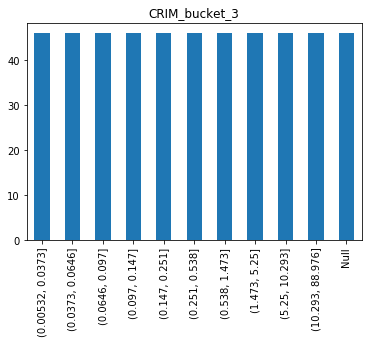

In [17]:
CRIM_bucket_3.value_counts(dropna = False).sort_index().plot('bar', title = 'CRIM_bucket_3')

# Weighted quantile bucketing

In [18]:
CRIM_bucket_4 = d.discretise(
    df = boston_df, 
    variable = 'CRIM', 
    weights_column = 'weights',
    bucketing_type = 'weighted_quantile', 
    quantiles = np.linspace(0, 1, 11)
)

In [19]:
CRIM_bucket_4.value_counts(dropna = False).sort_index()

(0.00532, 0.0376]    47
(0.0376, 0.0719]     59
(0.0719, 0.127]      59
(0.127, 0.196]       47
(0.196, 0.368]       45
(0.368, 0.994]       49
(0.994, 4.248]       50
(4.248, 10.293]      58
(10.293, 44.859]     42
Null                 50
Name: CRIM, dtype: int64

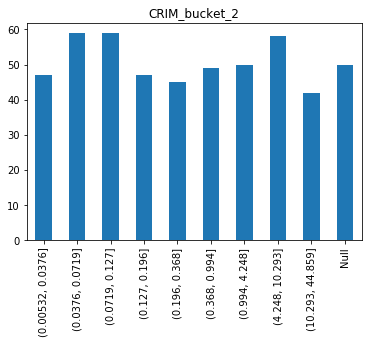

In [20]:
CRIM_bucket_4.value_counts(dropna = False).sort_index().plot('bar', title = 'CRIM_bucket_2')

In [21]:
boston_df.groupby(CRIM_bucket_4)['weights'].sum()

CRIM
(0.00532, 0.0376]    73.666667
(0.0376, 0.0719]     74.333333
(0.0719, 0.127]      73.000000
(0.127, 0.196]       75.000000
(0.196, 0.368]       73.000000
(0.368, 0.994]       74.666667
(0.994, 4.248]       72.333333
(4.248, 10.293]      75.333333
(10.293, 44.859]     73.000000
Null                 73.666667
Name: weights, dtype: float64

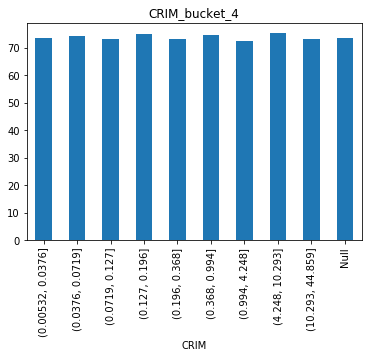

In [22]:
boston_df.groupby(CRIM_bucket_4)['weights'].sum().plot('bar', title = 'CRIM_bucket_4')